# 🥄숙박 | 음식업 | 도소매업


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 📊 시각화

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

> 맥 시각화 폰트 설정



In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

In [ ]:
plt.rc('font', family='NanumGothic')

In [ ]:
from matplotlib import font_manager as fm

# 시스템에 설치된 폰트 중에서 'Nanum'이 포함된 폰트를 찾는 코드
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name + " = " + fontInfo.fname)

In [ ]:
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

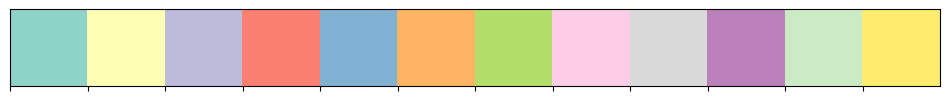

In [ ]:
palette = sns.color_palette('Set3')
sns.palplot(palette)

### 데이터 불러오기

In [ ]:
# 전처리한 폐업률 데이터 불러오기
df_pre = pd.read_csv('/content/drive/MyDrive/파이썬 시각화/pre_data/폐업률.csv')

In [ ]:
df_pre

,자치구_코드_명,서비스_업종_코드_명,점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,년,분기,년_분기
0,강동구,전자상거래업,1954,3.1,60,4,2024,2,2024-02
1,강동구,화장품,551,2.8,16,28,2024,2,2024-02
2,강동구,문구,132,5.5,8,13,2024,2,2024-02
3,강동구,의약품,405,1.8,8,30,2024,2,2024-02
4,강동구,편의점,35,4.5,19,383,2024,2,2024-02
...,...,...,...,...,...,...,...,...,...
7695,종로구,패스트푸드점,154,0.8,2,96,2019,1,2019-01
7696,종로구,양식음식점,468,3.5,18,48,2019,1,2019-01
7697,종로구,일식음식점,251,4.0,12,50,2019,1,2019-01
7698,종로구,중식음식점,199,6.6,14,14,2019,1,2019-01


In [ ]:
max_row = df_pre[df_pre['폐업_률'] == df_pre['폐업_률'].max()]

max_row

,자치구_코드_명,서비스_업종_코드_명,점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,년,분기,년_분기
7146,양천구,여관,30,20.0,6,0,2019,2,2019-02


In [ ]:
df = df_pre[df_pre['자치구_코드_명'] == '양천구']

In [ ]:
df['폐업_률']

,폐업_률
140,3.6
141,3.5
142,1.3
143,2.4
144,7.2
...,...
7499,1.9
7500,3.3
7501,3.4
7502,4.2


In [ ]:
# 양천구에서 폐업률이 20인 데이터 필터링
yangcheon_20_df = df[(df['자치구_코드_명'] == '양천구') & (df['폐업_률'] == 20.0)]

---------

### 폐업률

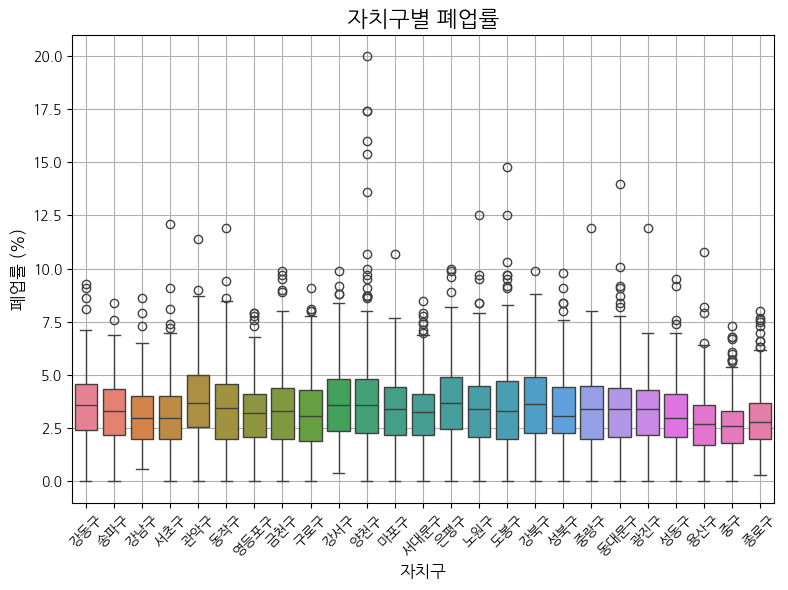

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='자치구_코드_명', y='폐업_률', data=df_pre, palette='husl')

# 그래프 꾸미기
plt.title('자치구별 폐업률', fontsize=16)
plt.xlabel('자치구', fontsize=12)
plt.ylabel('폐업률 (%)', fontsize=12)
plt.grid(True)

# X축 레이블을 45도 기울이기
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

양천구에서 평균을 벗어나는 큰값(20) 확인

-> 이상치인지 양천구에 어떤 사건이 있었는지 확인 후 이상치 처리


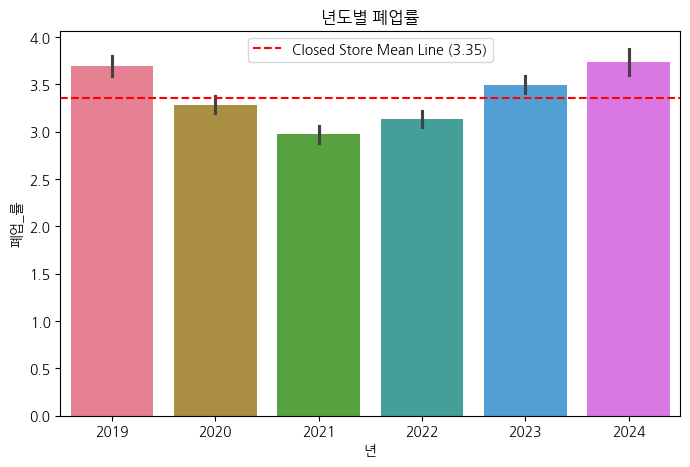

In [ ]:
# 연도별 폐업률

plt.figure(figsize=(8,5))
sns.set_palette('Set3')
sns.barplot(data=df_pre,x='년',y='폐업_률',palette='husl')

avg = df['폐업_률'].mean()
plt.axhline(avg, ls='--', color='r', label=f'Closed Store Mean Line ({round(avg,2)})')
plt.legend()
plt.title('년도별 폐업률')
plt.show()

<ipython-input-163-d3f3834f39b7>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_pre,x='년',y='폐업_률',ax=axes[0],palette='husl')


<Axes: xlabel='분기', ylabel='폐업_률'>

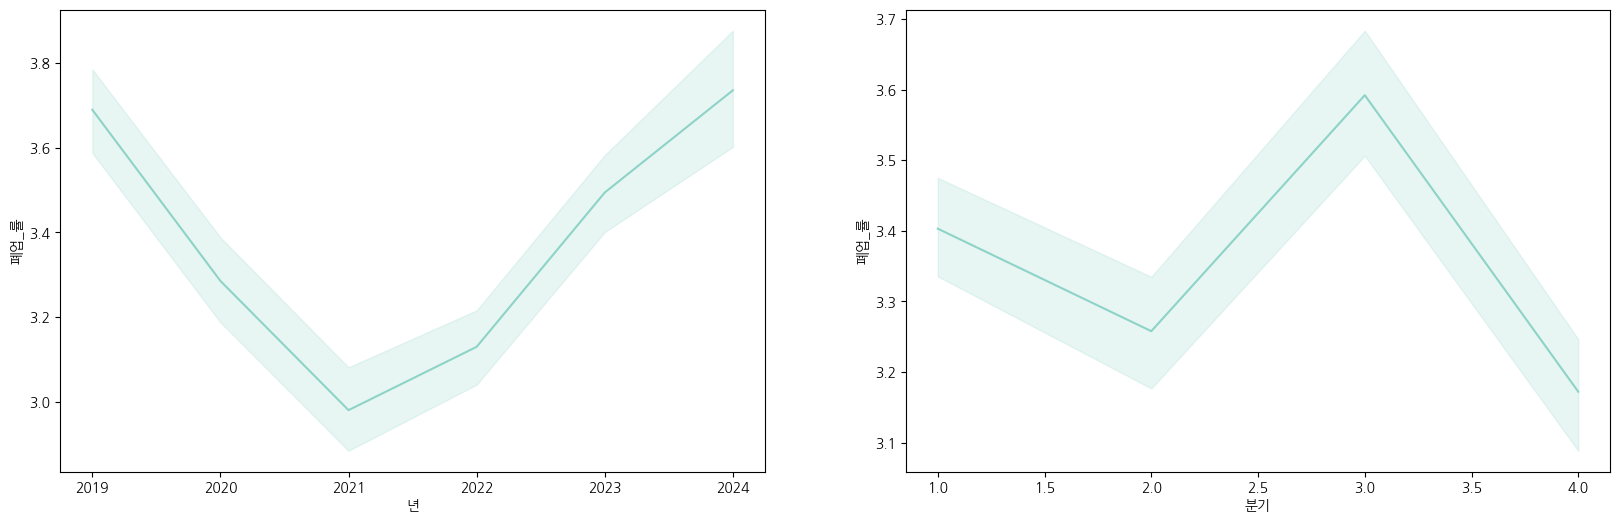

In [ ]:
# 년도별 분기별 폐업률

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.lineplot(data=df_pre,x='년',y='폐업_률',ax=axes[0],palette='husl')
sns.lineplot(data=df_pre,x='분기',y='폐업_률',ax=axes[1])

- 서울시 음식업, 폐업률이 2023년도 부터 크게 증가하는 추세를 보인다
- 3분기(7~9월)에 폐업률이 크게 상승하는 추세를 보인다.

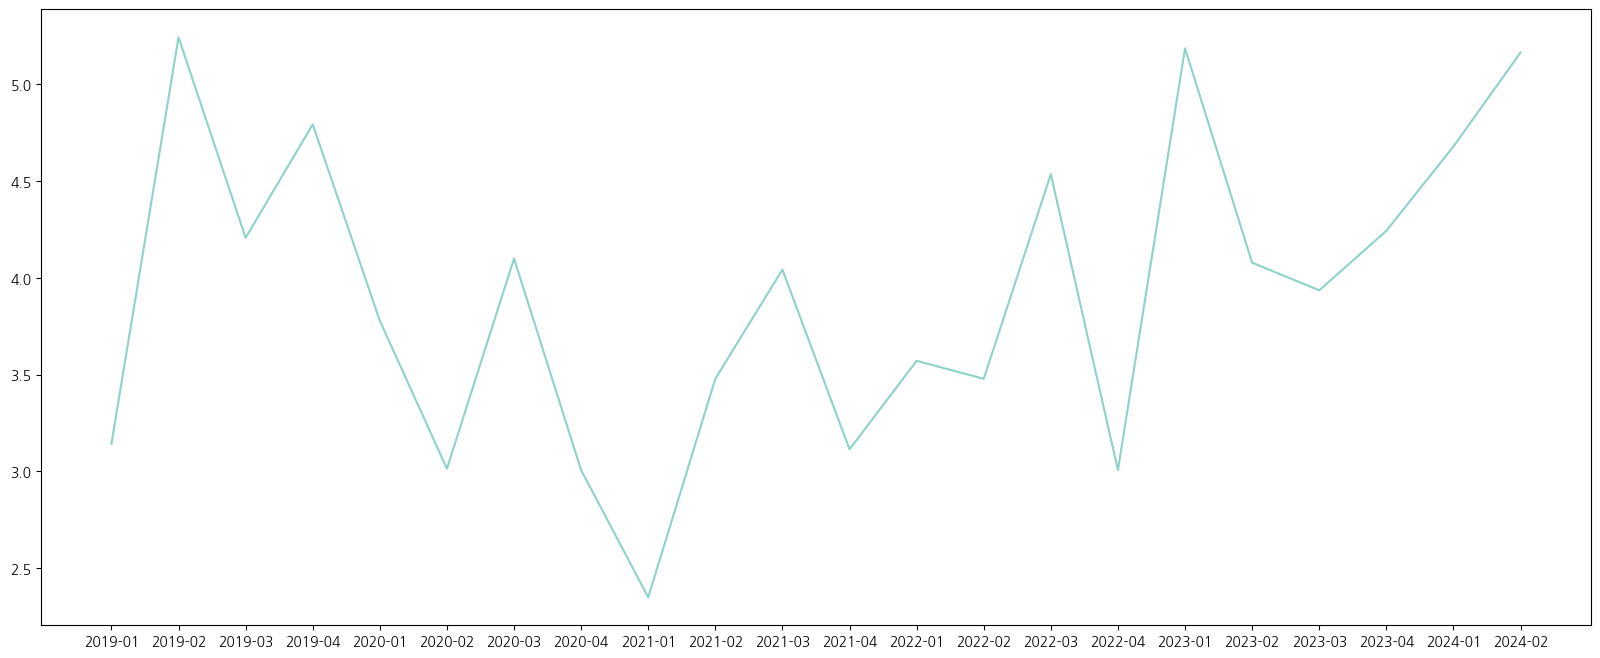

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_pre[df_pre['자치구_코드_명'] == '양천구'].groupby(['년_분기'])['폐업_률'].mean())

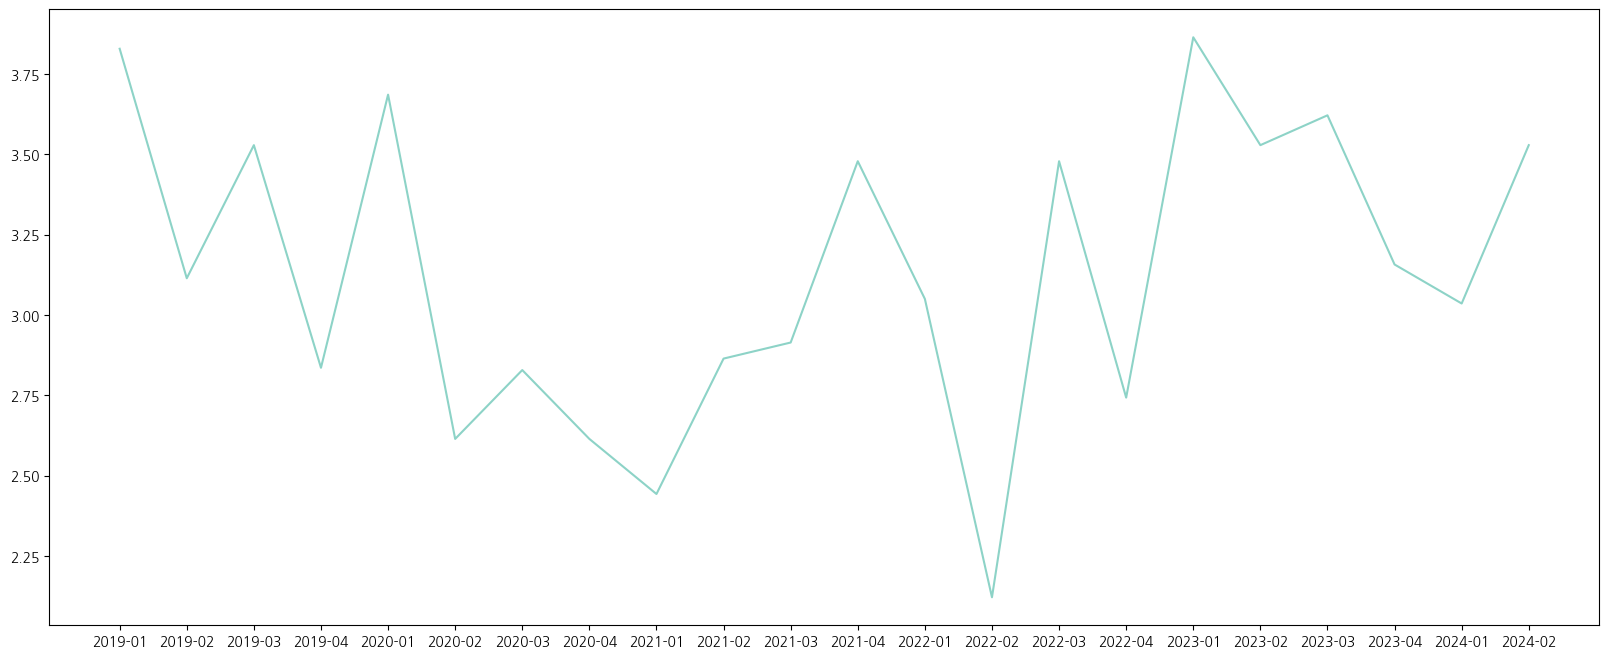

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_pre[df_pre['자치구_코드_명'] == '서초구'].groupby(['년_분기'])['폐업_률'].mean())

------

### 폐업률 높은 상위 10개 구의 폐업 점포와 프렌차이즈 점포 비율비교

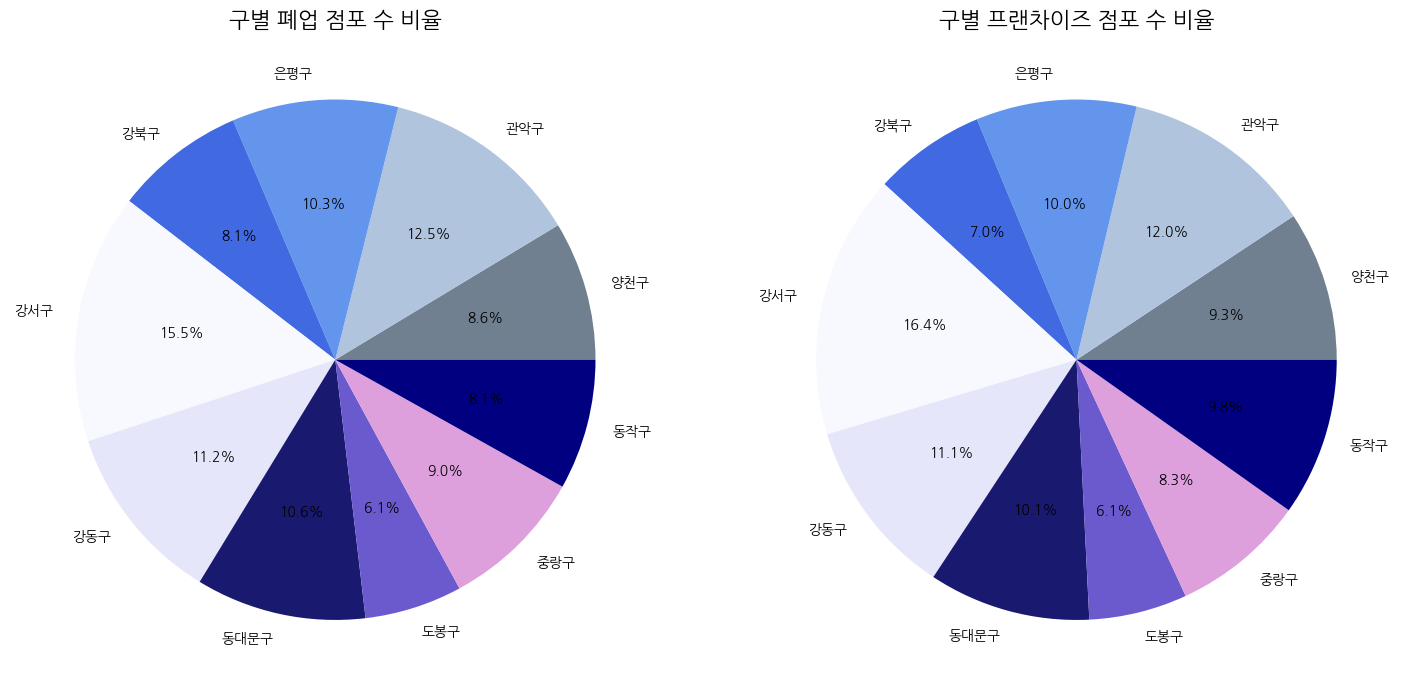

In [ ]:
# 구별 폐업률 합계 계산
grouped = df_pre.groupby('자치구_코드_명').agg({'폐업_률': 'sum', '폐업_점포_수': 'sum', '프랜차이즈_점포_수': 'sum'}).reset_index()

# 폐업률 합계가 가장 높은 10개 구 추출
top_10_closed = grouped.nlargest(10, '폐업_률')

# 서브플롯 생성
fig, axs = plt.subplots(1, 2, figsize=(15, 7))  # 1행 2열

# 폐업 점포 수 파이 차트
axs[0].pie(top_10_closed['폐업_점포_수'],
           labels=top_10_closed['자치구_코드_명'],
           autopct=lambda x: '{:.1f}%'.format(x),
           colors=['slategrey', 'lightsteelblue', 'cornflowerblue', 'royalblue',
                   'ghostwhite', 'lavender', 'midnightblue', 'slateblue', 'plum', 'navy'])
axs[0].set_title('구별 폐업 점포 수 비율', fontsize=16)

# 프랜차이즈 점포 수 파이 차트
axs[1].pie(top_10_closed['프랜차이즈_점포_수'],
           labels=top_10_closed['자치구_코드_명'],
           autopct=lambda x: '{:.1f}%'.format(x),
           colors=['slategrey', 'lightsteelblue', 'cornflowerblue', 'royalblue',
                   'ghostwhite', 'lavender', 'midnightblue', 'slateblue', 'plum', 'navy'])
axs[1].set_title('구별 프랜차이즈 점포 수 비율', fontsize=16)

# 그래프 간격 조정
plt.tight_layout()
plt.show()

### 폐업률 높은 상위 10개 구의 폐업 점포와 전체 점포 비율비교

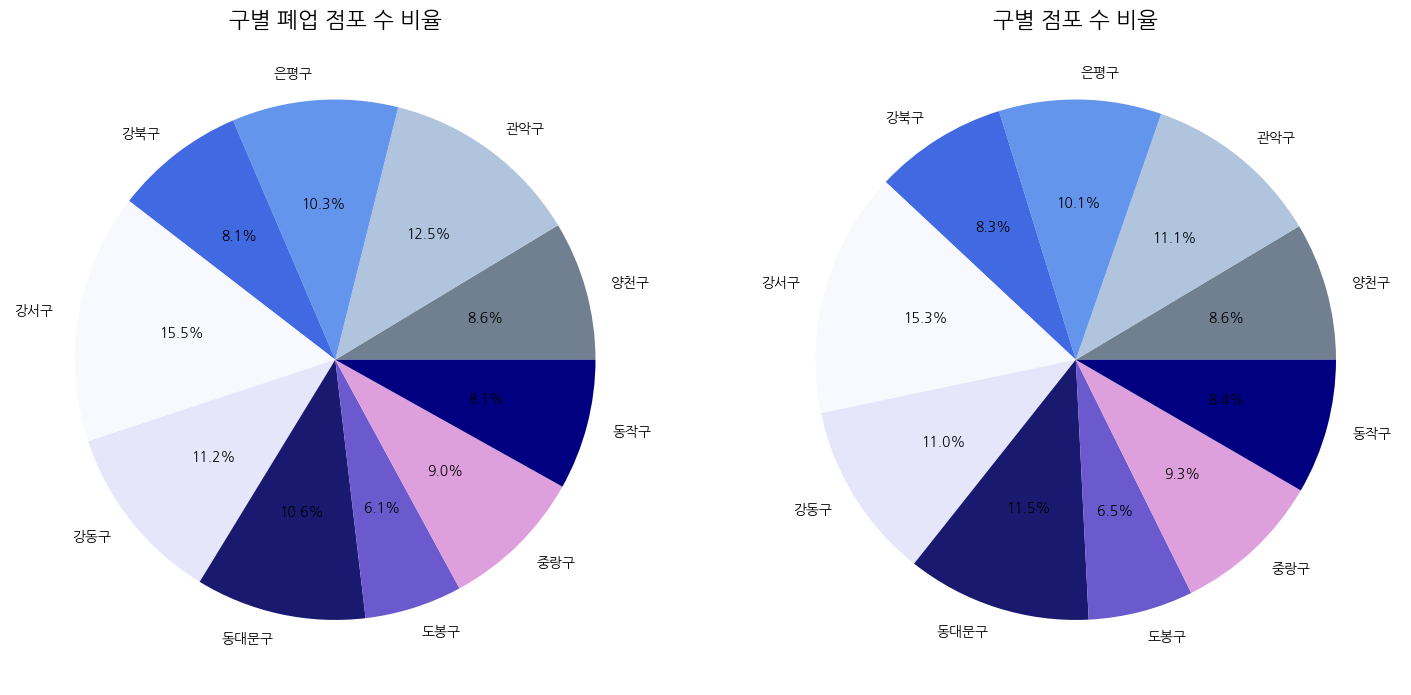

In [ ]:
# 구별 폐업률 합계 계산
grouped = df_pre.groupby('자치구_코드_명').agg({'폐업_률': 'sum', '폐업_점포_수': 'sum', '점포_수': 'sum'}).reset_index()

# 폐업률 합계가 가장 높은 10개 구 추출
top_10_closed = grouped.nlargest(10, '폐업_률')

# 서브플롯 생성
fig, axs = plt.subplots(1, 2, figsize=(15, 7))  # 1행 2열

# 폐업 점포 수 파이 차트
axs[0].pie(top_10_closed['폐업_점포_수'],
           labels=top_10_closed['자치구_코드_명'],
           autopct=lambda x: '{:.1f}%'.format(x),
           colors=['slategrey', 'lightsteelblue', 'cornflowerblue', 'royalblue',
                   'ghostwhite', 'lavender', 'midnightblue', 'slateblue', 'plum', 'navy'])
axs[0].set_title('구별 폐업 점포 수 비율', fontsize=16)

# 모든 점포 수 파이 차트
axs[1].pie(top_10_closed['점포_수'],
           labels=top_10_closed['자치구_코드_명'],
           autopct=lambda x: '{:.1f}%'.format(x),
           colors=['slategrey', 'lightsteelblue', 'cornflowerblue', 'royalblue',
                   'ghostwhite', 'lavender', 'midnightblue', 'slateblue', 'plum', 'navy'])
axs[1].set_title('구별 점포 수 비율', fontsize=16)

# 그래프 간격 조정
plt.tight_layout()
plt.show()